In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as spstats

In [2]:
from dap import DAPcython
from dap.utils import obs_params, obs_params_gbar, syn_current

In [3]:
from dap.dap_sumstats_moments import DAPSummaryStatsMoments

In [4]:
params, labels = obs_params_gbar(reduced_model=False)
I, time, t_on, t_off = syn_current(duration=120, dt=0.1)

In [5]:
# define models / check setters
dap = DAPcython(-75, params, solver=2)

In [6]:
# run models
data = dap.simulate(0.1, time, I)

In [7]:
x = {'data':data}
x

{'data': array([[-74.99230749],
        [-74.99763813],
        [-75.0135081 ],
        ...,
        [-77.45748634],
        [-77.47102163],
        [-77.50514515]])}

In [8]:
time

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.198e+02, 1.199e+02,
       1.200e+02])

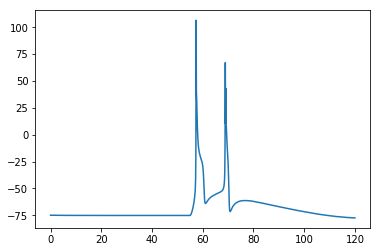

In [9]:
plt.plot(time, data);

In [10]:
N = data.shape[0]
t = time
dt = t[1] - t[0]

n_mom = 5
n_xcorr=5

## Calculate Summary Statistics

ind (array([   0,    1,    2, ..., 1198, 1199, 1200]), array([0, 0, 0, ..., 0, 0, 0]))
ind2 (array([], dtype=int64), array([], dtype=int64))


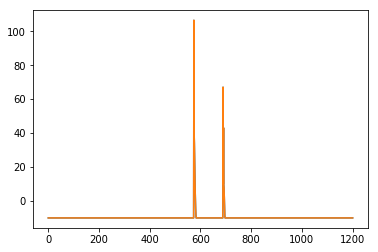

In [11]:
v = np.copy(data)
# put everything to -10 that is below -10 or has negative slope
ind = np.where(v < -10)
print('ind', ind)
v[ind] = -10
plt.plot(v)
ind2 = np.where(np.diff(v) < 0)
print('ind2', ind2)
v[ind] = -10
plt.plot(v)


In [12]:
v

array([[-10.],
       [-10.],
       [-10.],
       ...,
       [-10.],
       [-10.],
       [-10.]])

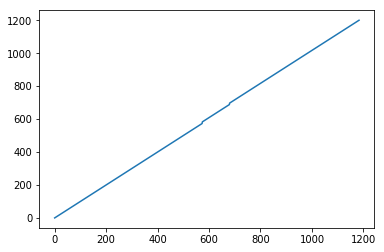

In [13]:
plt.plot(ind[0]);

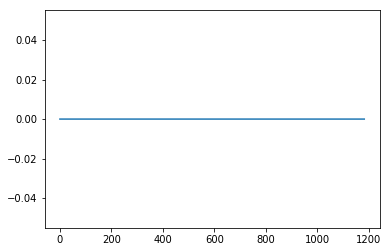

In [14]:
plt.plot(ind[1]);

In [15]:
np.diff(v) < 0

array([], shape=(1201, 0), dtype=bool)

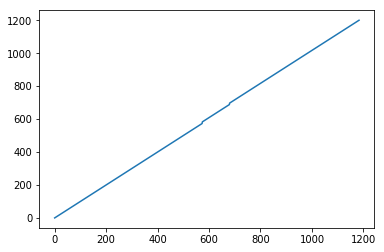

In [16]:
plt.plot(ind[0]);

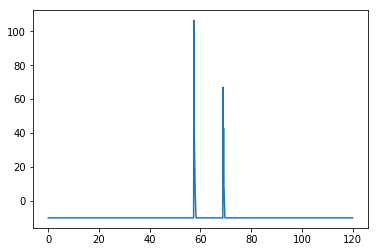

In [17]:
plt.plot(t, v);

In [18]:
# remaining negative slopes are at spike peaks
ind = np.where(np.diff(v) < 0)
ind

(array([], dtype=int64), array([], dtype=int64))

### Spike Times

In [19]:
# spike_times = np.array(t)[ind]

In [20]:
# spike_times_stim = spike_times[(spike_times > t_on) & (spike_times < t_off)]

In [21]:
# # number of spikes
# if spike_times_stim.shape[0] > 0:
#     spike_times_stim = spike_times_stim[np.append(1, np.diff(spike_times_stim))>0.5]

### Inter spike interval 

In [22]:
# ISI
#ISI = np.diff(spike_times_stim).astype(float)
# ind = [0,1,-1]
# ISI1 = np.array([1000.]*3)
# ISI1[0:np.maximum(0,spike_times_stim.shape[0]-1)] = ISI[ind[0:np.maximum(0,spike_times_stim.shape[0]-1)]]
#if spike_times_stim.shape[0] > 1:
#    ISImom = np.array([np.mean(ISI),np.std(ISI)])
#else:
#    ISImom = np.array([t_off,0.])
#ISI1 = np.array([t_off-t_on,0.])
#ISI1[0:np.maximum(0,spike_times_stim.shape[0]-1)] = ISImom[0:np.maximum(0,spike_times_stim.shape[0]-1)]


## accommodation index
#if spike_times_stim.shape[0] < 3:
#    A_ind = 1000
#else:
#    ISI = np.diff(spike_times_stim)
#    A_ind = np.mean( [ (ISI[i_min+1]-ISI[i_min])/(ISI[i_min+1]+ISI[i_min]) for i_min in range (0,ISI.shape[0]-1)] )

In [23]:
# resting potential and std
rest_pot = np.mean(x['data'][t<t_on])
rest_pot_std = np.std(x['data'][int(.9*t_on/dt):int(t_on/dt)])

In [24]:
# auto-correlations
x_on_off = x['data'][(t > t_on) & (t < t_off)]-np.mean(x['data'][(t > t_on) & (t < t_off)])
x_on_off

array([[-42.77266908],
       [-42.5324815 ],
       [-42.17721236],
       [-41.71458315],
       [-41.16728641],
       [-40.50417072],
       [-39.79607373],
       [-38.98828735],
       [-38.11278967],
       [-37.16814728],
       [-36.13381536],
       [-35.05535017],
       [-33.88309526],
       [-32.62128794],
       [-31.259353  ],
       [-29.75112291],
       [-28.05529914],
       [-26.1881367 ],
       [-23.85502783],
       [-20.8823611 ],
       [-16.45606296],
       [ -8.2444533 ],
       [ 15.65244195],
       [138.77380834],
       [ 72.45964   ],
       [ 66.41775473],
       [ 56.71238632],
       [ 47.15957653],
       [ 39.01742145],
       [ 32.58188078],
       [ 27.73723667],
       [ 24.15463471],
       [ 21.45135406],
       [ 19.34630086],
       [ 17.70234994],
       [ 16.27116929],
       [ 15.07253034],
       [ 14.06838893],
       [ 13.170923  ],
       [ 12.34245264],
       [ 11.59232943],
       [ 10.8799036 ],
       [ 10.1990131 ],
       [  9

In [25]:
x_corr_val = np.dot(x_on_off,x_on_off)

ValueError: shapes (49,1) and (49,1) not aligned: 1 (dim 1) != 49 (dim 0)

In [ ]:
xcorr_steps = np.linspace(1./dt,n_xcorr*1./dt,n_xcorr).astype(int)
x_corr_full = np.zeros(n_xcorr)
for ii in range(n_xcorr):
    x_on_off_part = np.concatenate((x_on_off[xcorr_steps[ii]:],np.zeros(xcorr_steps[ii])))
    x_corr_full[ii] = np.dot(x_on_off,x_on_off_part)

x_corr1 = x_corr_full/x_corr_val

In [ ]:
print(x_corr_full)
print(x_corr_val)

In [ ]:
std_pw = np.power(np.std(x['data'][(t > t_on) & (t < t_off)]), np.linspace(3,n_mom,n_mom-2))
std_pw = np.concatenate((np.ones(1),std_pw))
moments = spstats.moment(x['data'][(t > t_on) & (t < t_off)], np.linspace(2,n_mom,n_mom-1))/std_pw

In [ ]:
# concatenation of summary statistics
sum_stats_vec = np.concatenate((
        np.array([spike_times_stim.shape[0]]),
        x_corr1,
        np.array([rest_pot,rest_pot_std,np.mean(x['data'][(t > t_on) & (t < t_off)])]),
        moments
    ))
